In [1]:
import polars as pl
import matplotlib.pyplot as plt
import scipy.integrate as spint
import numpy as np

In [2]:
data = pl.read_csv('output.csv')
data

Time,Y,Z
f64,f64,f64
1.0,2.0,2.0
1.0001,2.0002,1.9999
1.0002,2.0004,1.9998
1.0003,2.0006,1.9997
1.0004,2.0008,1.9996
…,…,…
1.1995,2.373505,1.723006
1.1996,2.373677,1.722842
1.1997,2.373849,1.722679


In [3]:
data2 = pl.read_csv('output2.csv')
data2

Time,Y,Z
f64,f64,f64
1.0,2.0,2.0
1.1,2.195,1.873165
1.2,2.375254,1.716934


In [4]:
def test(t, x):
    ydot = x[1]

    ydotdot = 5 * t**2 - 3.0 / 2.0 * t**2 * x[0] * x[1]

    xdot = np.hstack([ydot, ydotdot])
    return xdot


IC = np.array([2.0, 2.0])
tspan = np.linspace(1.0, 1.2, 2000)

results = spint.solve_ivp(
    fun = test,
    t_span=[1.0,1.2],
    y0=IC,
    t_eval=tspan,
    method='RK45'
)

results

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e+00  1.000e+00 ...  1.200e+00  1.200e+00]
        y: [[ 2.000e+00  2.000e+00 ...  2.374e+00  2.374e+00]
            [ 2.000e+00  2.000e+00 ...  1.722e+00  1.722e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 14
     njev: 0
      nlu: 0

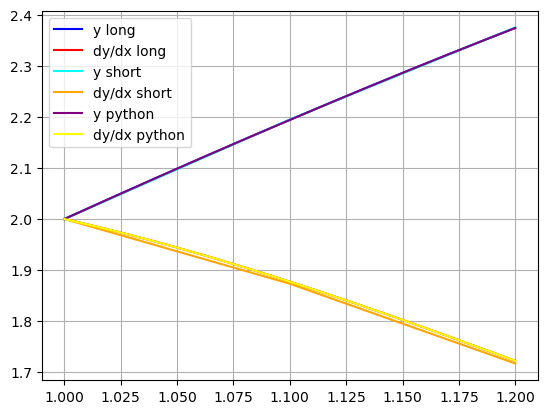

In [5]:
# High integration
plt.plot(data['Time'], data['Y'], label='y long', color='blue')
plt.plot(data['Time'], data['Z'], label='dy/dx long', color='red')

# Low Integration
plt.plot(data2['Time'], data2['Y'], label='y short', color='cyan')
plt.plot(data2['Time'], data2['Z'], label='dy/dx short', color='orange')

# Python
plt.plot(results.t, results.y[0], label='y python', color='purple')
plt.plot(results.t, results.y[1], label='dy/dx python', color='yellow')

plt.grid()
plt.legend()

In [15]:
def test(t, x):
    ydot = 5.0-3.0/2.0*x[0]**2

    xdot = np.hstack([ydot])
    return xdot


IC = np.array([10.])
tspan = np.linspace(1.0, 1.2, 3)

results = spint.solve_ivp(
    fun = test,
    t_span=[1.0,1.2],
    y0=IC,
    t_eval=tspan,
    method='RK23'
)

results

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e+00  1.100e+00  1.200e+00]
        y: [[ 1.000e+01  4.252e+00  2.919e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 29
     njev: 0
      nlu: 0

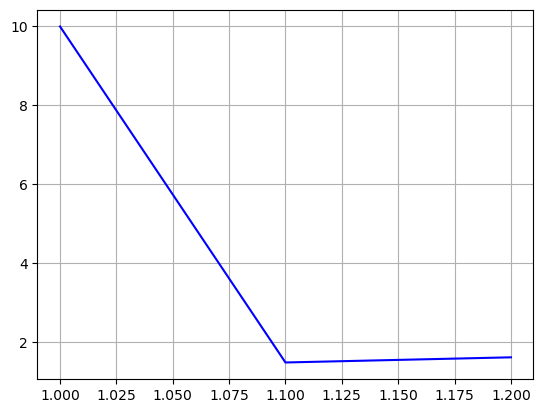

In [18]:
new_data = pl.read_csv('am2.csv')

plt.plot(new_data['Time'], new_data['Y'], color='Blue')
plt.grid()

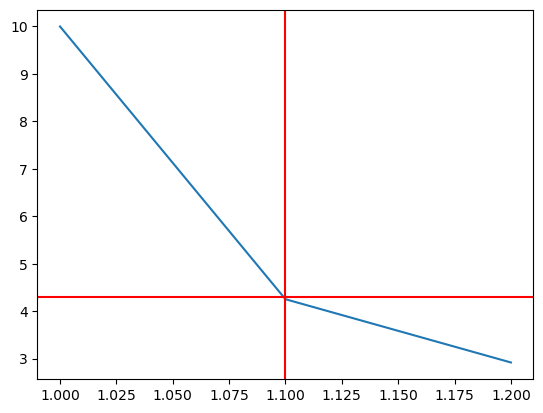

In [16]:
plt.plot(results.t, results.y[0])

plt.axvline(x=1.1, color='red')
plt.axhline(y=4.3, color='red')